Amandla Mvimbi

# 6.1

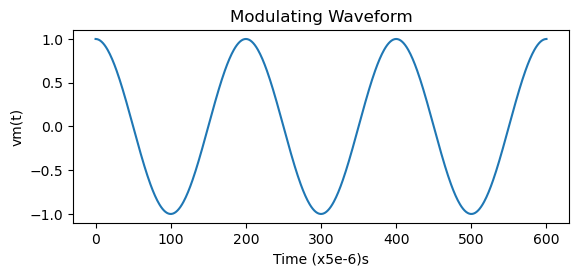

In [257]:
using PyPlot
#modulating signal properties
Δt = 0.000005
A = 1
f0m = 1000 
ω0m = 2*pi*f0m;
vm = A*cos.(ω0m*t);
figure(figsize=(6.4,2.5))
plot(vm)
title("Modulating Waveform")
xlabel("Time (x5e-6)s");
ylabel("vm(t)");

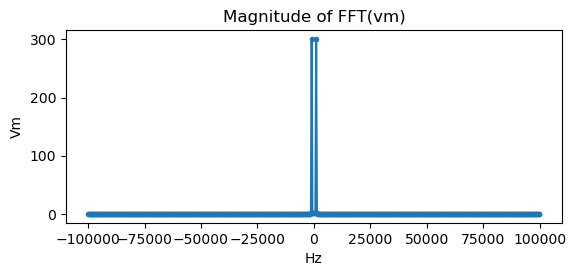

In [258]:
#FFT of Modulating Waveform
#Label the frequency axis in Hz
N = length(t);
Δf = 1/(N*Δt)  # spacing in frequency domain


#create array of freq values stored in f_axis. 
if mod(N,2)==0    # case N even
    f_axis = (-N/2:N/2-1)*Δf;    
else   # case N odd
    f_axis = (-(N-1)/2 : (N-1)/2)*Δf; 
end

using FFTW
Vm = fft(vm)
figure(figsize=(6.4,2.5))
plot(f_axis, fftshift(abs.(Vm)),".-")
title("Magnitude of FFT(vm)")
xlabel("Hz");
ylabel("Vm");

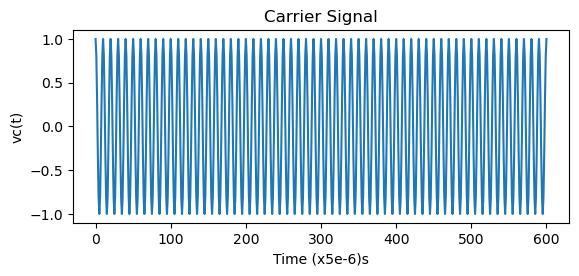

In [259]:
#Carrier properties
Δt = 0.000005
t = 0:Δt:0.003;
f0c = 20000 
ω0c = 2*pi*f0c;
A = 1
vc = A*cos.(ω0c*t);
figure(figsize=(6.4,2.5))
plot(vc)
title("Carrier Signal")
xlabel("Time (x5e-6)s");
ylabel("vc(t)");

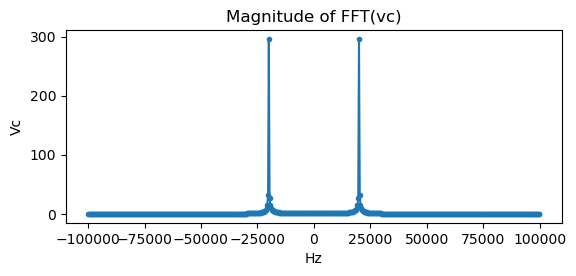

In [260]:
#FFT of Carrier Waveform
figure(figsize=(6.4,2.5))
Vm = fft(vc)
plot(f_axis, fftshift(abs.(Vm)),".-")
title("Magnitude of FFT(vc)")
xlabel("Hz");
ylabel("Vc");

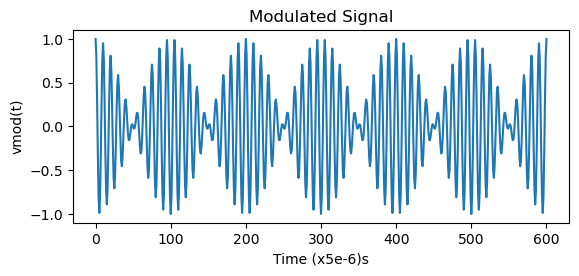

In [261]:
#(iii)
#Sinusoid-Modulated Carrier Waveform
figure(figsize=(6.4,2.5))
vmod = vc.*vm
figure(figsize=(6.4,2.5))
plot(vmod)
title("Modulated Signal")
xlabel("Time (x5e-6)s");
ylabel("vmod(t)");

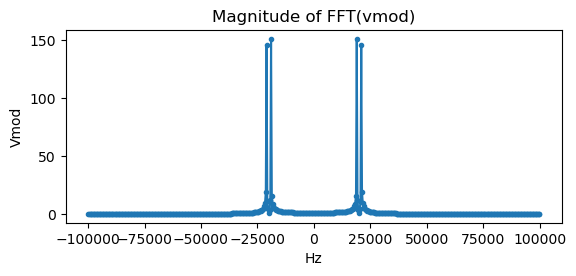

In [262]:
#FFT of Sinusoid-Modulated Carrier Waveform
figure(figsize=(6.4,2.5))
Vmod = fft(vmod)
plot(f_axis, fftshift(abs.(Vmod)),".-")
title("Magnitude of FFT(vmod)")
xlabel("Hz");
ylabel("Vmod");

(iii) The sidebands spread apart to ωc±2000𝜋

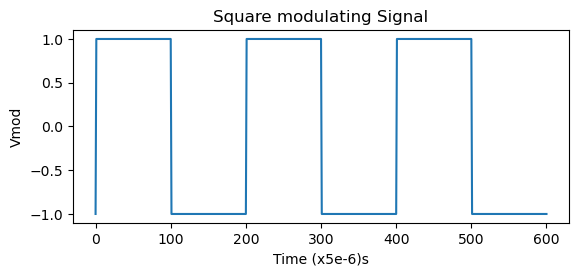

In [263]:
#(iv)
square(t) = ((sin.(2*pi*f0m*t) .>0) .-0.5)*2
figure(figsize=(6.4,2.5))
title("Square modulating Signal")
xlabel("Time (x5e-6)s");
plot(square(t))
ylabel("Vmod");

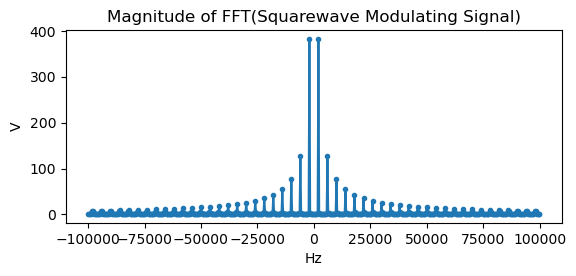

In [600]:
#FFT of squarewave Modulating Waveform
figure(figsize=(6.4,2.5))
Vsq = fft(square(t))
plot(f_axis,fftshift(abs.(Vsq)),".-")
title("Magnitude of FFT(Squarewave Modulating Signal)")
xlabel("Hz");
ylabel("V");

In [265]:
#Squarewave-Modulated Carrier Waveform
using Plots
vmod2 = vc.*square(t)
#figure(figsize=(6.4,2.5))
fig12 = Plots.plot(t,vmod2)
Plots.display(fig12)
Plots.plotly()
#title("Squarewave-Modulated Signal")
#xlabel("Time");
#ylabel("vmod(t)");

<!DOCTYPE html>
 
 
 Plots.jl

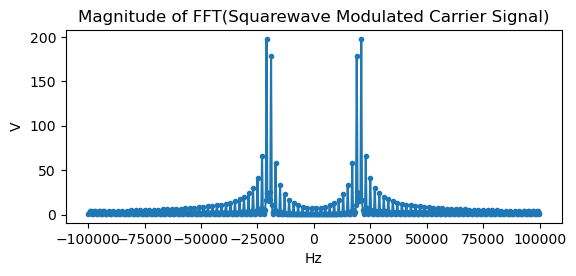

In [569]:
#FFT of squarewave Modulated Carrier
figure(figsize=(6.4,2.5))
Vmod2 = fftshift(abs.(fft(vmod2)))
plot(f_axis,Vmod2,".-")
title("Magnitude of FFT(Squarewave Modulated Carrier Signal)")
xlabel("Hz");
ylabel("V");

### There are sidebands at all odd harmonics of the squaremodulating square wave.

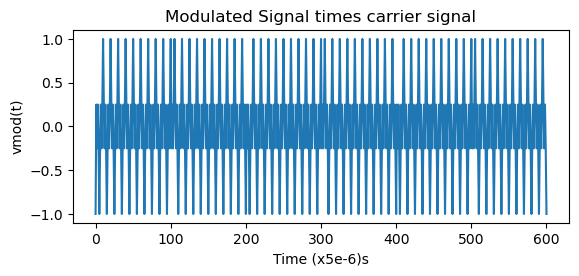

In [570]:
#6.1b)
#(i)
figure(figsize=(6.4,2.5))
y(t) = vmod2.*cos.(ω0c*t)
plot(y(t))
title("Modulated Signal times carrier signal")
xlabel("Time (x5e-6)s");
ylabel("vmod(t)");


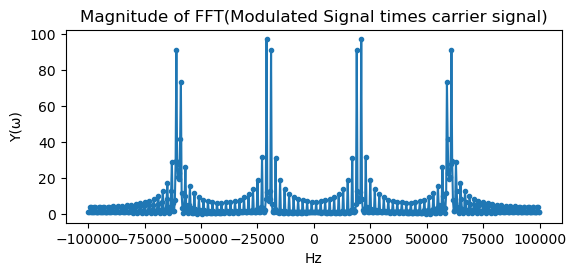

In [571]:

figure(figsize=(6.4,2.5))
plot(f_axis, fftshift(abs.(fft(y(t)))),".-")
title("Magnitude of FFT(Modulated Signal times carrier signal)")
xlabel("Hz");
ylabel("Y(ω)");

The there are frequencies at twice the fundamental frequency (at higher frequency) on either side, and lower frequencies close to the center which constitute 1/2f(t).

The Nyquist rate is 2kHz

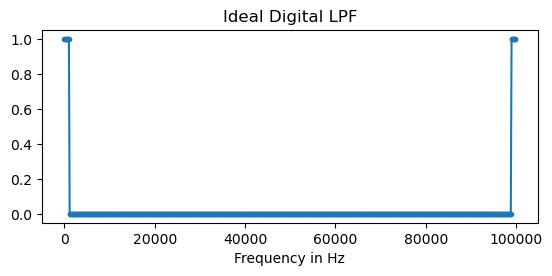

In [572]:
#ii)

Δω = 2*pi/(N*Δt)   # Sample spacing in freq domain in rad/s
ω = 0: Δω :(N-1)*Δω
f = ω/(2*π)
B = 1 # filter bandwidth in kHz

# In the sampled frequency domain. add a rect centred on zero to one centred at the next repeat
# i.e. centred on 0 rad/s an on 2pi/Δt rad/s.

H = rect(ω/(4*π*B)) + rect( (ω .- 2*π/Δt)/(4*π*B) )

figure(figsize=(6.4,2.5)); 
plot(f,H,".-");    # Note, H in this case is purely real.
title("Ideal Digital LPF")
xlabel("Frequency in Hz");

<!DOCTYPE html>
 
 
 Plots.jl

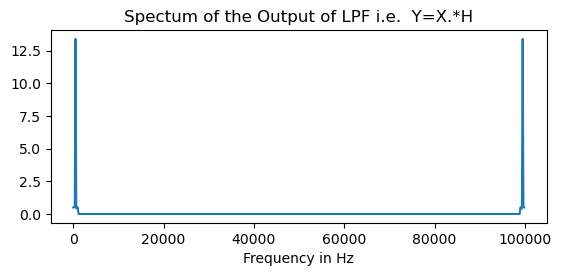

In [581]:
Y = H.*abs.(fft(y(t)))
figure(figsize=(6.4,2.5)); 
plot(f,abs.(Y))
title("Spectum of the Output of LPF i.e.  Y=X.*H")
xlabel("Frequency in Hz")

y_ = real(ifft(Y))   # Transform back to time domain using inverse transform
f17 = Plots.plot(t,y_)
Plots.display(f17)
#figure(figsize=(6.4,2.5)); 
#title("Output of LPF back in time domain");


The output does to a large degree agree with the theory, the recoverded signal is an approximation of a sinusoid with some resedual harmonics. However, the amplitude was not scaled down to 1/3f(t).


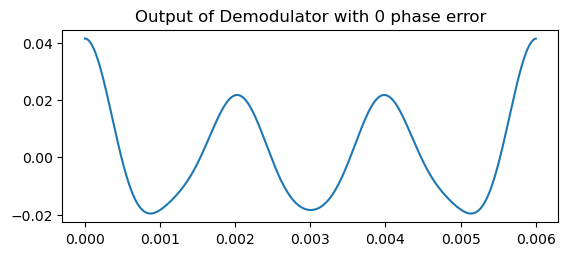

In [622]:
Ɵ = 0
figure(figsize=(6.4,2.5))
y(t) = vmod2.*cos.(ω0c*t .+ Ɵ)
Y = H.*abs.(fft(y(t)))
y_1 = real(ifft(Y))   # Transform back to time domain using inverse transform
figure(figsize=(6.4,2.5)); 
plot(t,y_1)
title("Output of Demodulator with 0 phase error");

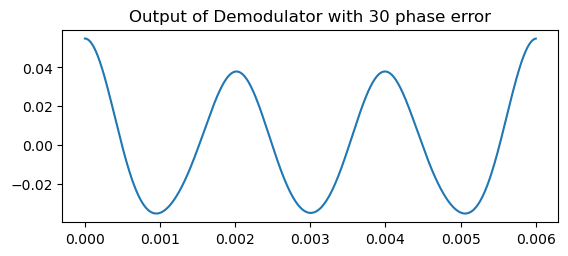

In [623]:
Ɵ = pi/6

figure(figsize=(6.4,2.5))
y(t) = vmod2.*cos.(ω0c*t .+ Ɵ)
Y = H.*abs.(fft(y(t)))
y_1 = real(ifft(Y))   # Transform back to time domain using inverse transform
figure(figsize=(6.4,2.5)); 
plot(t,y_1)
title("Output of Demodulator with 30 phase error");

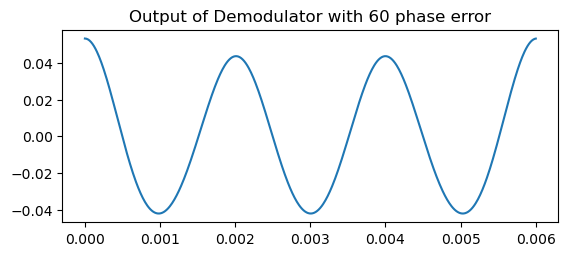

In [619]:
Ɵ = pi/3
figure(figsize=(6.4,2.5))
y(t) = vmod2.*cos.(ω0c*t .+ Ɵ)
Y = H.*abs.(fft(y(t)))
y_2 = real(ifft(Y))   # Transform back to time domain using inverse transform
figure(figsize=(6.4,2.5)); 
plot(t,y_2)
title("Output of Demodulator with 60 phase error");

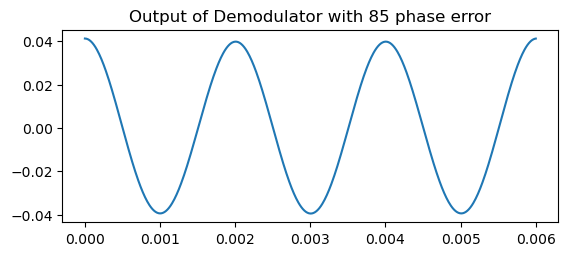

In [620]:
Ɵ = 17pi/36
figure(figsize=(6.4,2.5))
y(t) = vmod2.*cos.(ω0c*t .+ Ɵ)
Y = H.*abs.(fft(y(t)))
y_3 = real(ifft(Y))   # Transform back to time domain using inverse transform
figure(figsize=(6.4,2.5)); 
plot(t, y_3)
title("Output of Demodulator with 85 phase error");

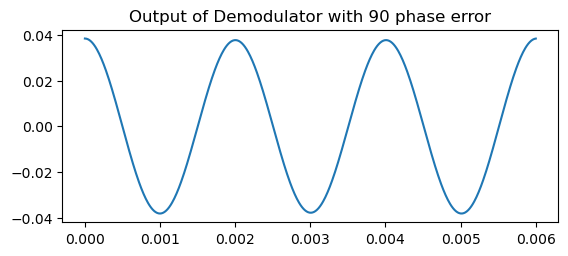

C:\Users\Amandla Mvimbi\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [587]:
Ɵ = pi/2

figure(figsize=(6.4,2.5))
y(t) = vmod2.*cos.(ω0c*t .+ Ɵ)
Y = H.*abs.(fft(y(t)))
y_ = ifft(Y)   # Transform back to time domain using inverse transform
figure(figsize=(6.4,2.5)); 
plot(t,y_)
title("Output of Demodulator with 90 phase error");

The phase error causes a scaling down of the amplitude at cos(Ɵ)

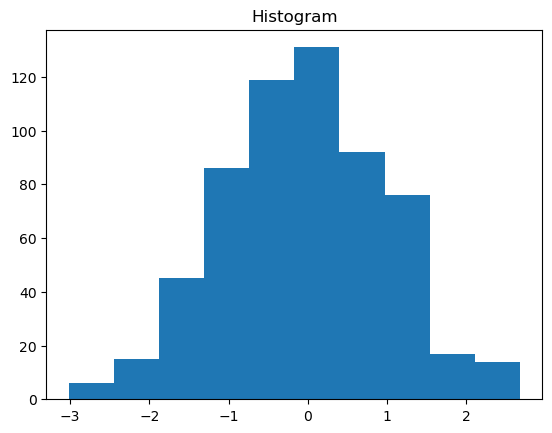

PyObject Text(0.5, 1.0, 'Histogram')

In [568]:
#6.1d)
σ = 1
noise = σ*randn(N)
figure()
hist(noise,10)
title("Histogram")

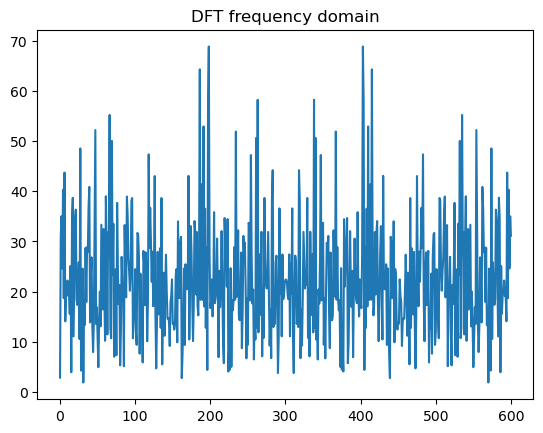

PyObject Text(0.5, 1.0, 'DFT frequency domain')

In [276]:
N_ω = fft(noise)
figure()
plot(abs.(N_ω))
title("DFT frequency domain")

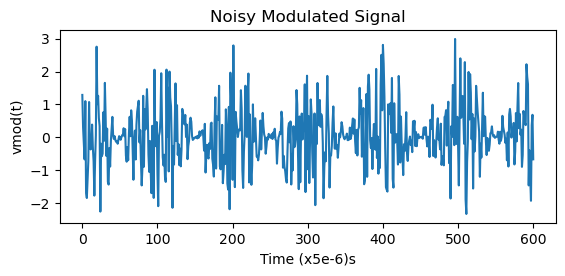

In [277]:
vmod3 = (vc.+noise).*vm
figure(figsize=(6.4,2.5))
plot(vmod3)
title("Noisy Modulated Signal")
xlabel("Time (x5e-6)s");
ylabel("vmod(t)");

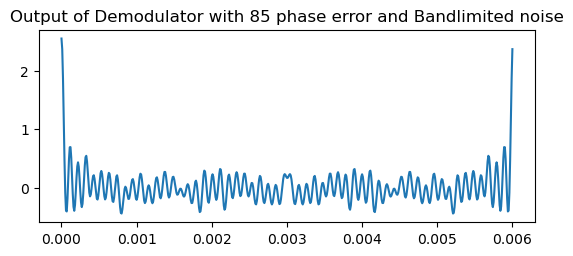

C:\Users\Amandla Mvimbi\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [639]:
Ɵ = 17pi/36
figure(figsize=(6.4,2.5))
y(t) = vmod3.*cos.(ω0c*t .+ Ɵ)
Y = H.*abs.(fft(y(t)))
y_ = ifft(Y)   # Transform back to time domain using inverse transform
figure(figsize=(6.4,2.5)); 
plot(t,y_)
title("Output of Demodulator with 85 phase error and Bandlimited noise");

(1) It results in the addition of noise at different frequencies from the ones within the initial bandlimit. This still results in noisy output, however of different frequency distribution.

(2) I would calcuate the noise power first from its power spectral density at the output, which for bandlimited noise simplifies to an arithmetic expression. I would the repeat the same proceedure for the carrier signal and take 10 * the logarithm of the ratio.

## 6.2 DSB - LC

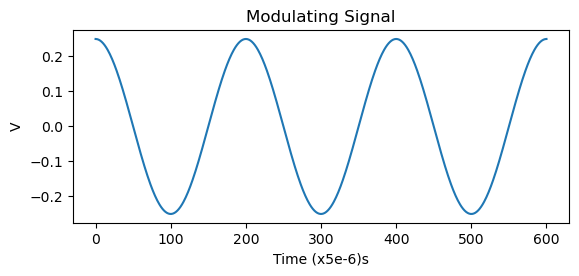

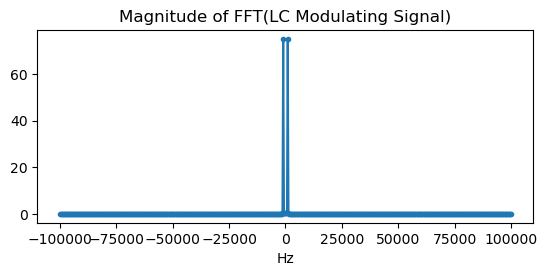

PyObject Text(0.5, 24.000000000000007, 'Hz')

In [337]:
#a)
#(i)
Δt = 0.000005
t = 0:Δt:0.003;
figure(figsize=(6.4,2.5))
A = 0.8
k = 0.5
vml = vm.*k
#(ii)
vcl = cos.(ω0c*t);
figure(figsize=(6.4,2.5))
plot(vml)
title("Modulating Signal")
xlabel("Time (x5e-6)s");
ylabel("vc(t)");
ylabel("V");

#FFT of  Modulating Signal
figure(figsize=(6.4,2.5))
plot(f_axis, fftshift(abs.(fft(vml))),".-")
title("Magnitude of FFT(LC Modulating Signal)")
xlabel("Hz")

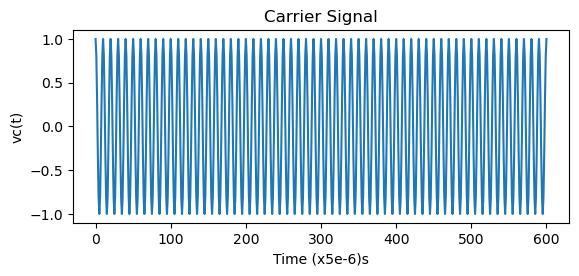

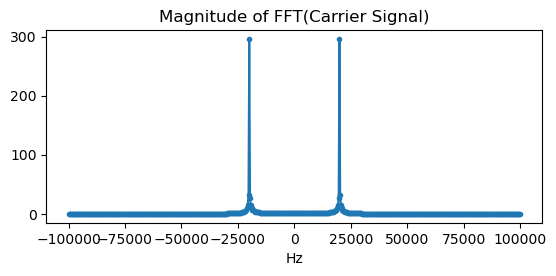

PyObject Text(0.5, 24.000000000000007, 'Hz')

In [338]:
#(ii)
vcl = cos.(ω0c*t);
figure(figsize=(6.4,2.5))
plot(vcl)
title("Carrier Signal")
xlabel("Time (x5e-6)s");
ylabel("vc(t)");

#FFT of Large Carrier Modulated Signal
figure(figsize=(6.4,2.5))
plot(f_axis, fftshift(abs.(fft(vcl))),".-")
title("Magnitude of FFT(Carrier Signal)")
xlabel("Hz")

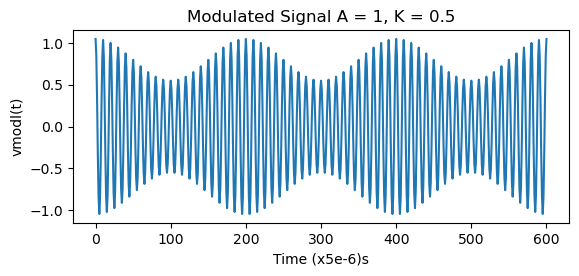

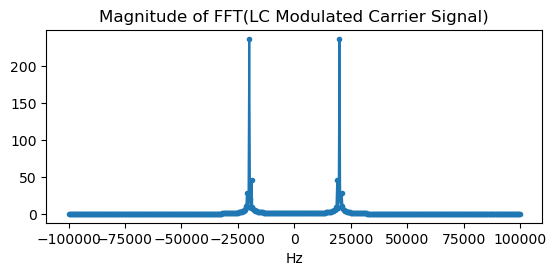

PyObject Text(0.5, 24.000000000000007, 'Hz')

In [339]:
#(iii)
vmodl = vc.*(vml.+A)
figure(figsize=(6.4,2.5))
plot(vmodl)
title("Modulated Signal A = 1, K = 0.5")
xlabel("Time (x5e-6)s");
ylabel("vmodl(t)");

#FFT of Large Carrier Modulated Signal
figure(figsize=(6.4,2.5))
plot(f_axis,fftshift(abs.(fft(vmodl))),".-")
title("Magnitude of FFT(LC Modulated Carrier Signal)")
xlabel("Hz")

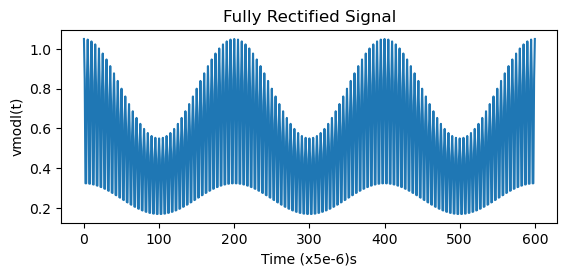

In [340]:
#6.2b)
out_rectifier = abs.(vmodl)
figure(figsize=(6.4,2.5))
plot(out_rectifier)
title("Fully Rectified Signal")
xlabel("Time (x5e-6)s");
ylabel("vmodl(t)");

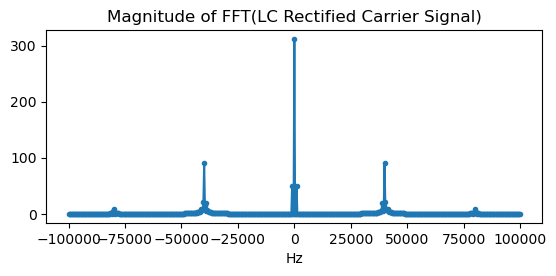

PyObject Text(0.5, 24.000000000000007, 'Hz')

In [341]:
#FFT of Large Carrier Modulated Signal
figure(figsize=(6.4,2.5))
plot(f_axis,fftshift(abs.(fft(out_rectifier))),".-")
title("Magnitude of FFT(LC Rectified Carrier Signal)")
xlabel("Hz")

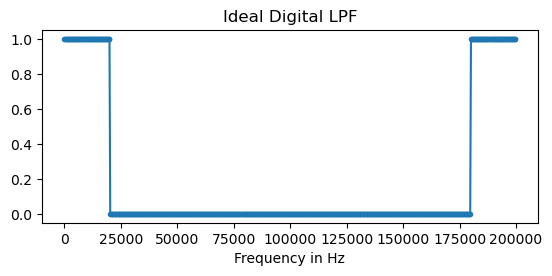

In [342]:
#ii)

Δω = 2*pi/(N*Δt)   # Sample spacing in freq domain in rad/s
ω = 0: Δω :(N-1)*Δω
f = ω/(2*π)
B = 20 # filter bandwidth in kHz

# In the sampled frequency domain. add a rect centred on zero to one centred at the next repeat
# i.e. centred on 0 rad/s an on 2pi/Δt rad/s.

H = rect(ω/(4*π*B)) + rect( (ω .- 2*π/Δt)/(4*π*B) )

figure(figsize=(6.4,2.5)); 
plot(f,H,".-");    # Note, H in this case is purely real.
title("Ideal Digital LPF")
xlabel("Frequency in Hz");

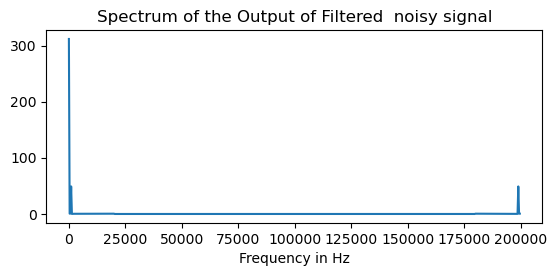

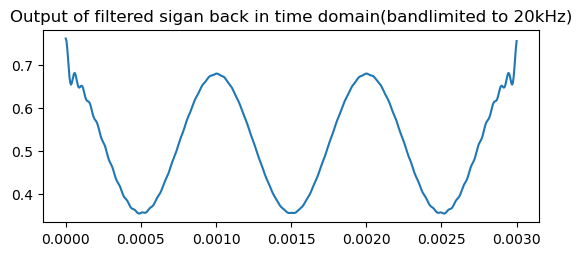

C:\Users\Amandla Mvimbi\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [343]:
#output_of_fil =real(ifft(fft(out_rectifier).*H))
out_fil =abs.(fft(out_rectifier).*H)
figure(figsize=(6.4,2.5)); 
plot(f,out_fil)
title("Spectrum of the Output of Filtered  noisy signal")
xlabel("Frequency in Hz")

y_ = ifft(out_fil)   # Transform back to time domain using inverse transform
figure(figsize=(6.4,2.5)); 
plot(t,y_)
title("Output of filtered sigan back in time domain(bandlimited to 20kHz)");


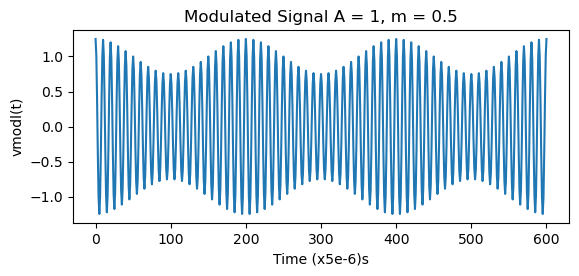

In [344]:
#6.2c)
m = 0.5
vmodl = vc.*(1 .+m.*vm)
figure(figsize=(6.4,2.5))
plot(vmodl)
title("Modulated Signal A = 1, m = 0.5")
xlabel("Time (x5e-6)s");
ylabel("vmodl(t)");

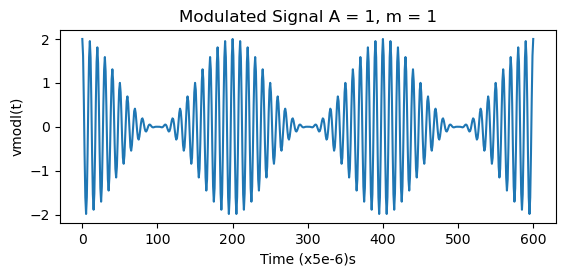

In [345]:
#6.2c)
m = 2
vmodl = vc.*(1 .+m.*vm)
figure(figsize=(6.4,2.5))
plot(vmodl)
title("Modulated Signal A = 1, m = 1")
xlabel("Time (x5e-6)s");
ylabel("vmodl(t)");

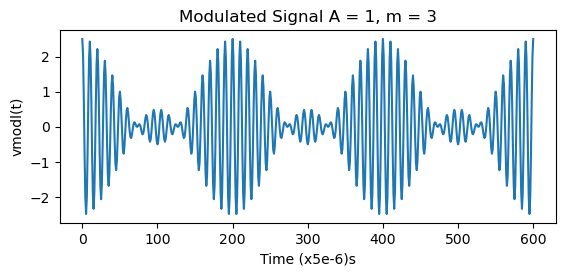

In [347]:
#6.2c)
m = 3
vmodl = vc.*(1 .+m.*vm)
figure(figsize=(6.4,2.5))
plot(vmodl)
title("Modulated Signal A = 1, m = 3")
xlabel("Time (x5e-6)s");
ylabel("vmodl(t)");

# 6.3 Quadrature multiplexing

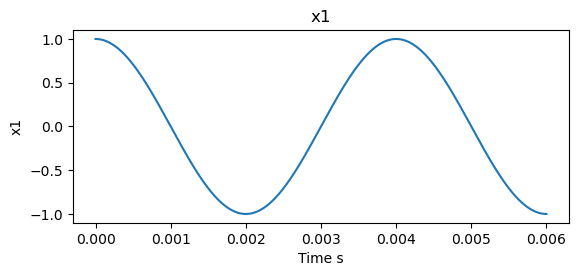

In [599]:
#6.3
t = 0:Δt:0.006;
Δt = 0.00001
fm1 = 250  
fm2 = 1000
fc =10000
x1 = cos.(2*pi*fm1.*t)
x2 = cos.(2*pi*fm2.*t)
Փ1 = x1.*cos.(2*pi*fc.*t)
Փ2 = x2.*sin.(2*pi*fc.*t)
Փ = Փ1 .+ Փ2
y1 = Փ.*cos.(2*pi*fc.*t)
y2 = Փ.*sin.(2*pi*fc.*t )
figure(figsize=(6.4,2.5))
plot(t,x1)
title("x1")
xlabel("Time s");
ylabel("x1");

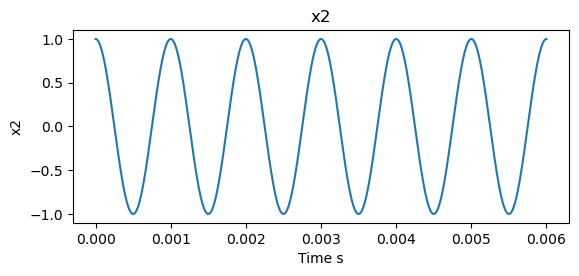

In [534]:
figure(figsize=(6.4,2.5))
plot(t,x2)
title("x2")
xlabel("Time s");
ylabel("x2");

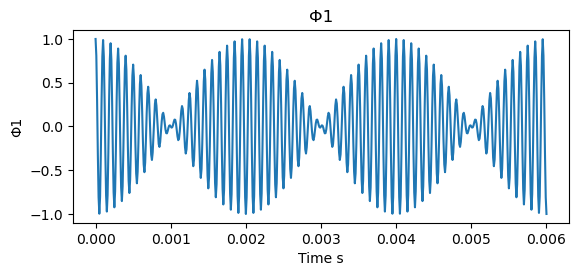

In [535]:
figure(figsize=(6.4,2.5))
plot(t,Փ1)
title("Փ1")
xlabel("Time s");
ylabel("Փ1");

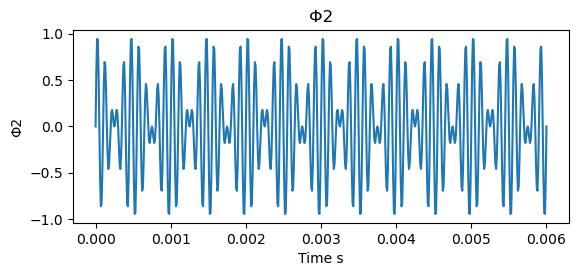

In [536]:
figure(figsize=(6.4,2.5))
plot(t,Փ2)
title("Փ2")
xlabel("Time s");
ylabel("Փ2");

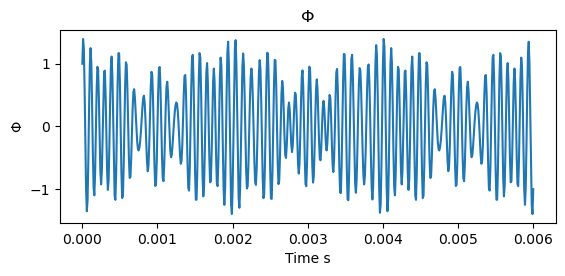

In [537]:
figure(figsize=(6.4,2.5))
plot(t,Փ)
title("Փ")
xlabel("Time s");
ylabel("Փ");

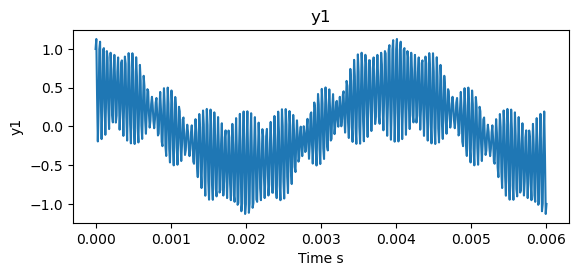

In [538]:
figure(figsize=(6.4,2.5))
plot(t,y1)
title("y1")
xlabel("Time s");
ylabel("y1");

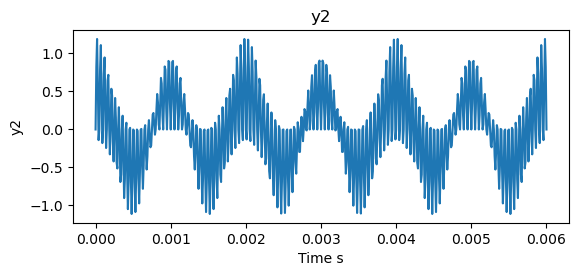

In [539]:
figure(figsize=(6.4,2.5))
plot(t,y2)
title("y2")
xlabel("Time s");
ylabel("y2");

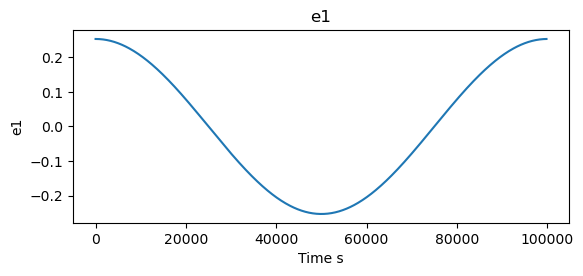

In [630]:
ω = 0: Δω :(N-1)*Δω
Y1 = abs.(fft(y1))
Y2 = abs.(fft(y2))
Δω = 2*pi/(N*Δt)   # Sample spacing in freq domain in rad/s
ω = 0: Δω :(N-1)*Δω
f = ω/(2*π)
B = 0.3 # filter bandwidth in kHz
H = rect(ω/(4*π*B)) + rect( (ω .- 2*π/Δt)/(4*π*B) )
E1 = Y1.*H
e1 = real.(ifft(E1))
figure(figsize=(6.4,2.5))
plot(f,e1)
title("e1")
xlabel("Time s");
ylabel("e1");

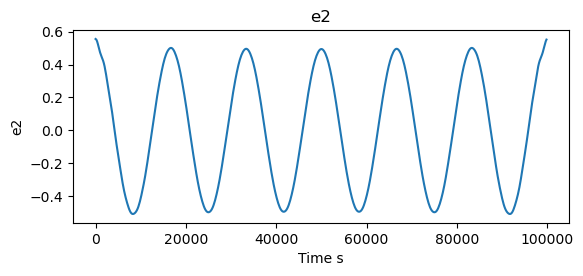

In [631]:
B = 10 # filter bandwidth in kHz
H = rect(ω/(4*π*B)) + rect( (ω .- 2*π/Δt)/(4*π*B) )
E2 = Y2.*H
e2 = real.(ifft(E2))
figure(figsize=(6.4,2.5))
plot(f,e2)
title("e2")
xlabel("Time s");
ylabel("e2");

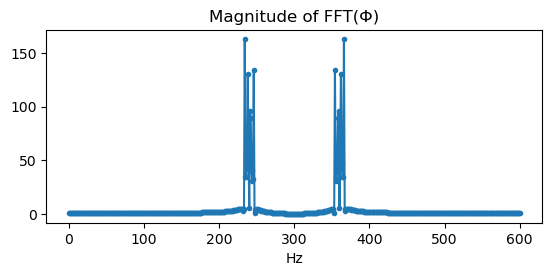

PyObject Text(0.5, 24.000000000000007, 'Hz')

In [632]:
#FFT of Փ
figure(figsize=(6.4,2.5))
plot(fftshift(abs.(fft(Փ))),".-")
title("Magnitude of FFT(Փ)")
xlabel("Hz")

(1) By nyquist theorem, it(sampling frequency) has to be at least creater than twice the hihgset frequency in the waveform

(2) It is twice the largest frequency existant in the sprectrum Փ(t) which is that of x2. Hence it computed by multiplying B2 by two

(3)This cause the recovered wave to have harmonic distortions that increase as the error increases. When the error is zero, the signal is retrieved without this distortion.